MSE: 0.2225899267544737


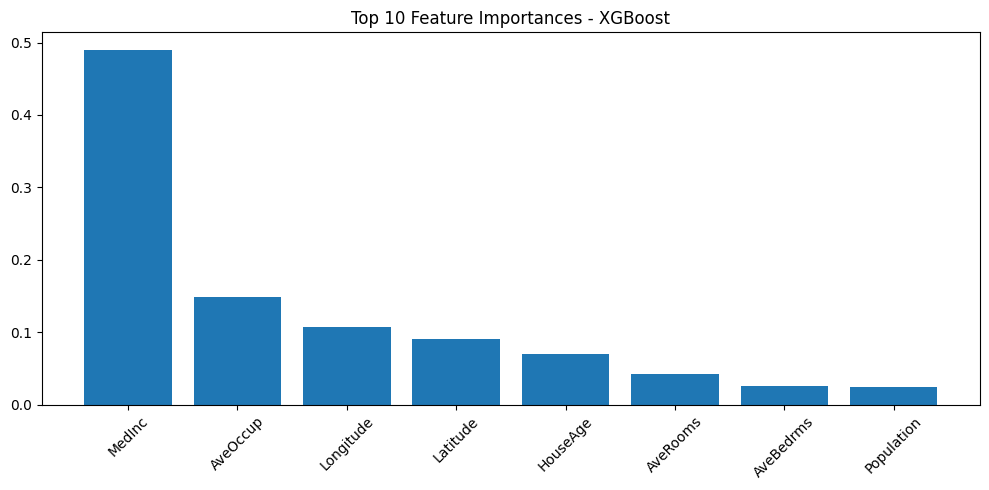

In [4]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

importances = xgb.feature_importances_
features = data.feature_names

imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(imp_df['Feature'], imp_df['Importance'])
plt.xticks(rotation=45)
plt.title('Top 10 Feature Importances - XGBoost')
plt.tight_layout()
plt.show()
